Для современных сервисов важно не только предоставлять качественный продукт, но и знать, насколько довольны им пользователи. Понимая, что нравится или не нравится пользователям, можно адаптировать и улучшать сервис.

Довольные пользователи чаще возвращаются, оставляют положительные отзывы в социальных сетях и способствуют росту аудитории благодаря рекомендациям.

Недовольные пользователи часто уходят к конкурентам и могут оставлять негативные отзывы, что снижает привлекательность сервиса для новых пользователей.

Чтобы эффективно измерить уровень удовлетворенности клиентов и влияние наших улучшений на восприятие сервиса, нам необходима соответствующая метрика (показатель).

Метрика NPS подходит для этой задачи, так как с помощью простого и быстрого опроса можно получить ясные и понятные данные о лояльности клиентов. Она наглядно показывает уровень удовлетворенности и помогает выявлять сторонников и критиков бренда.

Достаточно задать пользователям вопрос "Насколько вероятно, что вы порекомендуете наш сервис друзьям или близким?" и предложить оценить по шкале от 0 до 10, где 0 означает "крайне маловероятно", а 10 — "крайне вероятно".

В зависимости от полученных ответов, пользователей необходимо будет разделить на 3 группы:

Promoters (9-10 баллов): Довольные потребители, готовые рекомендовать продукт
Passives (7-8 баллов): Удовлетворенные, но не обязательно будут рекомендовать
Detractors (0-6 баллов): Недовольные, скорее всего оставят негативные отзывы
Net Promoter Score рассчитывается как разница между процентом промоутеров и процентом критиков

Как видно, из формулы расчета NPS, эта метрика фокусируется только на самых положительных и самых отрицательных отзывах, не учитывая нейтральные мнения пользователей и находится в диапазоне от -100% (все критики) до 100% (все сторонники).
Этот подход основан на том, пассивные пользователи не оказывают значительного влияния на репутацию бренда, так как не способствуют росту через рекомендации и не оставляют критические отзывы.

Плюсы NPS
Простота сбора и анализа
Пример: Можно быстро посчитать и проанализировать данные, собранные через онлайн-опросы.
Помогает сосредоточить внимание на удовлетворенности и лояльности клиентов
Пример:  Анализ низких оценки NPS в итоге привел к улучшению работы службы поддержки
(Задача ML: INTENT CLASSIFICATION)
Можно использовать для сравнения результатов с конкурентами
Пример: Более высокий чем у конкурентов NPS можно использовать  для привлечения инвесторов.
Позволяет отследить динамику отношения пользователей к компании
Пример: Регулярные опросы показали, что улучшения в интерфейсе программы повысили NPS на 30% за полгода.
Минусы NPS
Не всегда ясно, почему потребители ставят ту или иную оценку
Пример: Непонятны причины низких оценок пользователей, если комментарии не были обязательными.
Учитывает только крайние мнения пользователей – очень довольных или недовольных
Пример: Может привести к неправильной оценке общей удовлетворенности клиентов, так как игнорируются мнения тех, кто не проявляет активного неудовольствия.

Сбор оценок и подсчет NPS
Задание
На данном шаге необходимо создать Python-класс для сбора обратной связи от пользователей, вычисления Net Promoter Score  и визуализации этой метрики в динамике. Это важно для организаций, стремящихся улучшить качество обслуживания и повысить удовлетворенность клиентов. Исследование NPS в динамике позволяет определять, как клиенты оценивают сервис, и вовремя реагировать на их потребности.

In [40]:
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime


class NPS:
    """
    A class used to collect and analyze customer feedback,
    including calculating the Net Promoter Score (NPS) and plotting it over time.

    Attributes:
        feedbacks (dict): A dictionary to store feedback scores by period formatted as YYYYMM.
    """

    def __init__(self):
        """
        Initializes the NPS class with an empty dictionary for storing feedbacks.
        """
        self.feedbacks = {}

    def add_feedback(self, score: int, score_date: datetime = None):
        """
        Adds a feedback score for a specific datetime.

        Parameters:
            score (int): The customer's feedback score, must be between 0 and 10 inclusive.
            score_date (datetime, optional): The datetime of the feedback. Defaults to the current datetime if not provided.

        Raises:
            ValueError: If the score is not an integer or not within the range of 0 to 10.
        """
        if not isinstance(score, int) or not (0 <= score <= 10):
            raise ValueError("Invalid score")
        
        
        if score_date is None:
            score_date = datetime.now()
            
        score_date = int(score_date.strftime('%Y%m'))
        
        if score_date not in self.feedbacks:
            self.feedbacks[score_date] = []
        
        self.feedbacks[score_date].append(score)

    def calculate_nps(self, period: int) -> float:
        """
        Calculates and returns the Net Promoter Score (NPS) for a given period.

        Parameters:
            period (int): The period for which to calculate the NPS, formatted as YYYYMM.

        Returns:
            float: The calculated NPS, rounded to two decimal places.
            NPS ranges from -100 (all detractors) to 100 (all promoters).

        Explanation:
            NPS is calculated using the formula: ((Promoters - Detractors) / Total Responses) * 100
            - Promoters are rated 9 or 10.
            - Detractors are rated 6 or below.
            - Passives (scores of 7 and 8) do not directly affect the NPS.
        
        If no feedbacks are available for the specified period, returns 0
        """

        promoters = sum(1 for score in self.feedbacks[period] if score >= 9)
        detractors = sum(1 for score in self.feedbacks[period] if score <= 6)
        return round((promoters - detractors)/len(self.feedbacks) * 100,2)

    def plot_trend(self, show_plot: bool = True) -> pd.DataFrame:
        """
        Plots NPS for each period stored in the feedbacks dictionary.

        Parameters:
            show_plot (bool): If True, displays the plot of NPS dynamics over time (default is True).

        Returns:
            pd.DataFrame: This DataFrame includes the following columns:
                - 'period' (int32): The period of feedback in YYYYMM format.
                - 'nps' (float32): The Net Promoter Score for that period.
            If the feedbacks dictionary is empty, returns an empty DataFrame.
        """
        if not self.feedbacks:
            return pd.DataFrame()
        
        data = {
            'period': [],
            'nps': []
        }
        for period, scores in self.feedbacks.items():
            nps = self.calculate_nps(int(period))
            data['period'].append(int(period))
            data['nps'].append(nps)

        df = pd.DataFrame(data)
        
        if show_plot:
            plt.figure(figsize=(10, 6 ))
            plt.plot(df['period'], df['nps'], marker = 'o', label = 'NPS')
            plt.title('NPS OVER TIME')
            plt.xlabel('Period (YYYYMM)')
            plt.ylabel('NPS')
            plt.grid(True)
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
        return df


Feedbacks: {202501: [10, 10, 10, 1, 0, 6, 5, 1, 3, 3]}


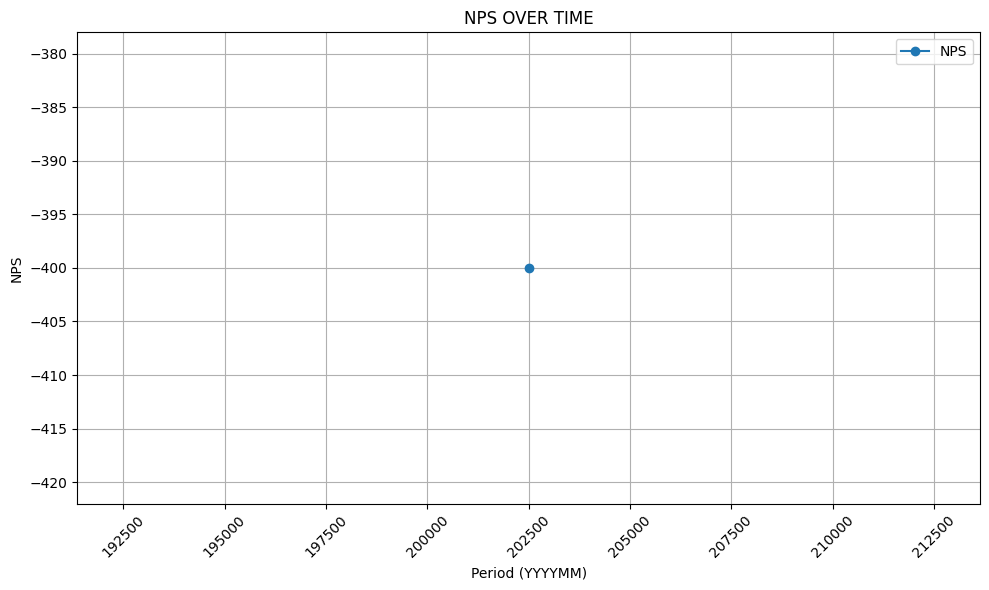

,period,nps
0,202501,-400.0


In [41]:
import random
from random import randint

nps = NPS()

# random 10 feedbacks
for i in range(10):
    random_score = random.randint(0, 10)
    nps.add_feedback(random_score)

print(f'Feedbacks: {nps .feedbacks}')
nps.plot_trend()

# >>Feedbacks: {202406: [4, 5, 7, 7, 10, 4, 9, 4, 4, 10]}

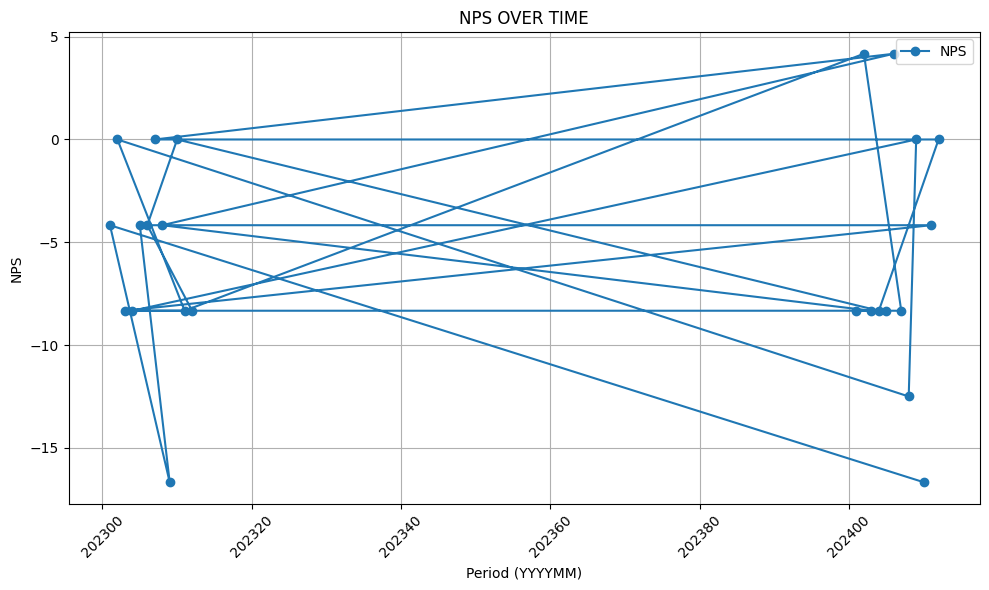

,period,nps
0,202410,-16.67
1,202301,-4.17
2,202309,-16.67
3,202305,-4.17
4,202411,-4.17


In [42]:
import random
from datetime import datetime, timedelta

nps = NPS()

random.seed(42)
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
delta = end_date - start_date

for _ in range(100):  
    random_date = start_date + timedelta(days=random.randint(0, delta.days))
    random_score = random.randint(0, 10)
    nps.add_feedback(score=random_score, score_date=random_date)

nps_trend_df = nps.plot_trend()
nps_trend_df.head() 


Расчет динамики изменения NPS
На предыдущем шаге мы разработали инструмент для сбора оценок пользователей и подсчета NPS. На этом этапе мы потренируемся в расчете динамики NPS, используя данные, собранные за 2023 год. Также мы проанализируем изменения в уровне удовлетворенности клиентов за год.

В 2023 году был запущен проект SoulGPT, предлагающий уникальную услугу: ассистент - психолог, который выступает в роли внимательного слушателя, позволяя пользователям делиться своими переживаниями и эмоциональными трудностями. Эта услуга призвана не только предоставить эмоциональную разгрузку, но и облегчить общее психологическое состояние клиентов.

Стоимость подписки на сервис составляет 2000 рублей в месяц, что позволяет получить до 10 сессий. Для сравнения, в среднем один поход к психологу в Москве обходится от 3000 до 5000 рублей. Таким образом, пользователи SoulGPT могут получить психологическую помощь за гораздо меньшую цену.

SoulGPT быстро набрал популярность, и к началу 2024 года у них уже было несколько тысяч активных пользователей. Одним из ключевых показателей успеха для SoulGPT была метрика NPS, отражающая уровень удовлетворенности клиентов и их готовность рекомендовать услугу другим.

В течение всего 2023 года компания проводила регулярные опросы своих клиентов, собирая данные о NPS каждый месяц. Для разработки стратегии на следующий год и улучшения сервиса, необходимо провести детальный анализ собранных данных, чтобы понять, как менялся уровень удовлетворенности клиентов в течение 2023 года.

Задание
Напишите запрос, который для каждого месяца 2023 года вычислит значение метрики NPS.

Использования предыдущих оценок пользователей
Подход, при котором учитываются предыдущие оценки пользователей, может быть интересен/полезен по нескольким причинам:

Сглаживание влияния сезонных факторов - в некоторых отраслях существуют сезонные колебания в пользовательском поведении
Оценки пользователей, как правило, не меняются резко от месяца к месяцу -  использование предыдущих оценок предотвращает искажение результатов и сохраняет непрерывность данных, что важно для выявления трендов.

А для расчета NPS мы будем использовать дополнительные оценки - оценки предыдущих месяцев, но не более 90 дней.

In [ ]:
'''sql
WITH months AS (
    SELECT
        date_trunc('month', score_date)::date AS month
    FROM
        customer_feedback
    WHERE
        extract(year from score_date) = 2023
    GROUP BY
        month
),
extend_feedback AS (
    SELECT
        m.month,
        f.user_id,
        f.score,
        f.score_date
    FROM
        months m
    LEFT JOIN
    customer_feedback f on f.score_date between m.month - interval '90 days' AND m.month +  interval '30 days'
),
last_scores_in_month AS (
    SELECT DISTINCT ON (user_id, month)
        user_id,
        month,
        score AS last_score
    FROM
        extend_feedback
    ORDER BY
        user_id,
        month,
        score_date DESC
),
nps_calcs AS (
    SELECT
        month,
        COUNT(1) FILTER (WHERE last_score >= 9)::float AS promoter_ct,
        COUNT(1) FILTER (WHERE last_score <= 6)::float AS detractor_ct,
        COUNT(1)::float AS all_responses_ct
    FROM
        last_scores_in_month
    GROUP BY
        month
    ORDER BY
        month
)
SELECT
    month,
    ROUND(CAST(((promoter_ct/all_responses_ct) - (detractor_ct/all_responses_ct)) * 100.00 AS numeric), 2) AS nps
FROM
    nps_calcs;
'''